**ЛР 6**  
**Вариант 20**

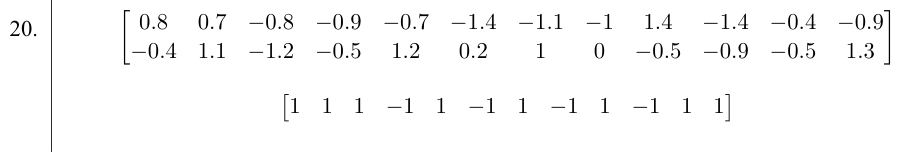

In [312]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from timeit import default_timer as timer
from IPython.display import Image
import imageio

In [313]:
train_data = [[0.8, -0.4]], [[0.7, 1.1]], [[-0.8, -1.2]], [[-0.9, -0.5]], [[-0.7, 1.2]], [[-1.4, 0.2]], [[-1.1, 1]], [[-1, 0]], [[1.4, -0.5]], [[-1.4, -0.9]], [[-0.4, -0.5]], [[-0.9, 1.3]]
classes = np.array(([1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1]))

In [314]:
train_data = []
train_data += [[0.8, -0.4]]
train_data += [[0.7, 1.1]]
train_data += [[-0.8, -1.2]]
train_data += [[-0.9, -0.5]]
train_data += [[-0.7, 1.2]]
train_data += [[-1.4, 0.2]]
train_data += [[-1.1, 1]]
train_data += [[-1, 0]]
train_data += [[1.4, -0.5]]
train_data += [[-1.4, -0.9]]
train_data += [[-0.4, -0.5]]
train_data += [[-0.9, 1.3]]

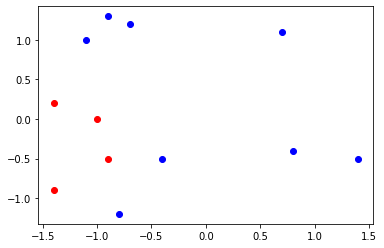

In [315]:
for i in range(len(classes)):
  if classes[i] > 0:
    plt.scatter(train_data[i][0], train_data[i][1], color='blue')
  else:
    plt.scatter(train_data[i][0], train_data[i][1], color='red')
plt.show()

In [321]:
class Kohonen:
    def __init__(self, dim, nodes_count, lr, nodes, r):
         self.dim = dim
         self.lr = lr
         self.nodes_count = nodes_count
         self.r = r
         self.nodes = nodes.copy()


    def fit(self, data, epochs):
        rcpy = self.r
        lrcpy = self.lr
        for e in range(epochs):
            np.random.shuffle(data)
            for i in range(len(data)):
                min_dist = np.sqrt(np.sum((data[i] - self.nodes[0]) ** 2))
                index_min_node = 0
                for j in range(self.nodes_count):
                        dist = np.sqrt(np.sum((data[i] - self.nodes[j]) ** 2))
                        if (min_dist > dist):
                            min_dist = dist
                            index_min_node = j
                for j in range(self.nodes_count):
                    dist = np.sqrt(np.sum((self.nodes[index_min_node] - self.nodes[j]) ** 2))
                    if  dist < self.r:
                        self.nodes[j] += self.lr * np.exp(- dist / (2 * self.r)) * (- self.nodes[j] + data[i])
            self.lr = max(0.01, lrcpy * np.exp(-(e + 1) / epochs))
            self.r = rcpy * np.exp(- (e + 1) * np.log(rcpy) / epochs)

In [322]:
nepoch = 500

In [323]:
data = np.array(([[0.0, 1], [0.1, 0.9], [-0.1, 0.9], [-0.8, 0.1], [-0.9, 0.0], [-0.7, 0.0], [1, -1.0], [1.1, -1.1], [1.2, -1.0]]))
nodes = np.array([[0.0, 0.5], [0.5, -0.5], [1, 1], [1, 1], [0.0, 0.0]], dtype = float)

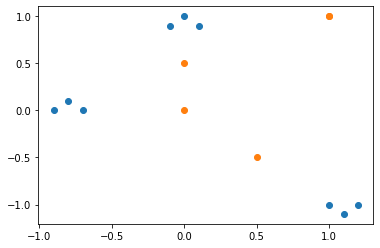

In [324]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(nodes[:, 0], nodes[:, 1])

plt.show()

In [325]:
kohonen = Kohonen(dim = 2, nodes_count = 5, lr = 1, nodes = nodes, r = 0.5)
kohonen.fit(data, nepoch)

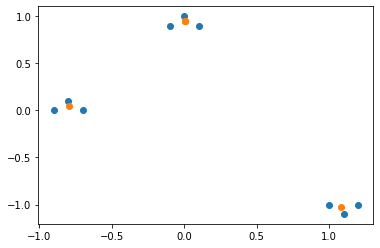

In [326]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(kohonen.nodes[:, 0], kohonen.nodes[:, 1])

plt.show()

In [327]:
nepoch = 200

In [328]:
def func1(x):
  return (x + 1) ** 2

def func_nodes(x):
  return x ** 2  + 2 * x + 0.5

In [329]:
x = np.arange(0, np.pi / 2, 0.01)
y = func1(x)
xy_vals =  np.c_[x, y]
x_nodes = np.arange(0, np.pi / 2, 0.1)
y_nodes = func_nodes(x_nodes)
xy_nodes = np.c_[x_nodes, y_nodes]

In [330]:
kohonen = Kohonen(dim = 2, nodes_count = len(xy_nodes), lr = 1, nodes = xy_nodes, r = 0.01)
kohonen.fit(xy_vals, nepoch)

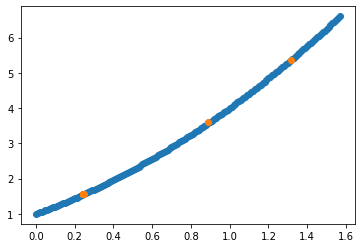

In [331]:
plt.scatter(xy_vals[:, 0], xy_vals[:, 1])
plt.scatter(kohonen.nodes[:, 0], kohonen.nodes[:, 1])

plt.show()

In [332]:
def func1(x):
  return  2 * x

def func_nodes(x):
  return 2.5 * x

In [333]:
x = np.arange(0, 2, 0.01)
y = func1(x)
xy_vals =  np.c_[x, y]
x_nodes = np.arange(0, 2, 0.1)
y_nodes = func_nodes(x_nodes)
xy_nodes = np.c_[x_nodes, y_nodes]

In [334]:
kohonen = Kohonen(dim = 2, nodes_count = len(xy_nodes), lr = 1, nodes = xy_nodes, r = 0.01)
kohonen.fit(xy_vals, nepoch)

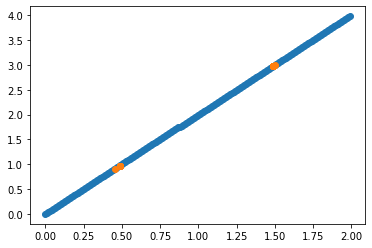

In [335]:
plt.scatter(xy_vals[:, 0], xy_vals[:, 1])
plt.scatter(kohonen.nodes[:, 0], kohonen.nodes[:, 1])

plt.show()